# Make a software package for generating train/test data

+ Utilities for combining models / directional forcing
+ 

In [62]:
# import numpy as np
# import matplotlib.pyplot as plt
# import warnings
# from numpy.random import random, seed, normal
# import glob
# import os.path

# from mpl_toolkits.mplot3d import axes3d

# import scipy

# from chaos_ensemble import *
# from utils import *

# blue, red, turquoise, purple, magenta, orange  = [[0.372549, 0.596078, 1], [1.0, .3882, .2784], 
#                                  [0.20784314, 0.67843137, 0.6], [0.59607843, 0.25882353, 0.89019608],
#                                          [0.803922, 0.0627451, 0.462745], [0.917647, 0.682353, 0.105882]]

# from sklearn.metrics import accuracy_score, balanced_accuracy_score

# %matplotlib inline
# # %matplotlib widget
# plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

# %load_ext autoreload
# %autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import sys

import matplotlib.pyplot as plt

from thom import *
from thom.utils import *

%load_ext autoreload
%autoreload 2

In [ ]:
import sdepy

eqf = lambda x, t : np.vstack([eq(item, t) for item in x]).T
eqf = lambda x, t : np.array(eq(x, t))

@sdepy.integrate
def grn_process(t, x, sigma=0.1):
    return {'dt': eqf(x, t)[None, :], 'dw': sigma}

# sol = grn_process(x0=np.array(ic)[:, None], 
#                 paths=1, 
#                 steps=1000, 
#                 vshape=3)(tpts)

# sol = grn_process(x0=np.array(ic)[:, None], 
#                 paths=1, 
#                 steps=1000, 
#                 vshape=3)(tpts)

n_genes = 3
n_cells = 10
sol = grn_process(x0=np.random.random((n_genes, n_cells)) - 0.5, 
                paths=n_cells, 
                steps=1000, 
                vshape=n_genes)(fine_tvals)

## Make Lorenz Ensemble for classification

In [9]:
def generate_lorenz_ensemble(tpts0, n_samples, params, frac_perturb_param=.1, 
                             n_classes=2, frac_transient=0.1, 
                             ic_range=None,
                            random_state=0):
    """
    Generate an ensemble of trajectories with random initial conditions, labelled by different
    sets of parameters.
    
    tpts : the timesteps over which to run the simulation
    params : iterable, the starting values for the parameters
    n_samples : int, the number of different initial conditons
    n_classes : int , the number of different parameters
    frac_perturb_param : float, the amount to perturb the parameters by
    frac_transient : float, the fraction of time for the time series to settle onto the attractor
    ic_range : a starting value for the initial conditions
    random_state : int, the seed for the random number generator
    """
    np.random.seed(random_state)
    
    ntpts = len(tpts0)
    dt = tpts0[1] - tpts0[0]
    t_range = tpts0[-1] - tpts0[0]
    tpts = np.arange(tpts0[0], tpts0[0] + t_range*(1 + frac_transient), dt)
    
    num_per_class = int(n_samples/n_classes)

    all_params = list()
    all_samples = list()
    for i in range(n_classes):
    
        params_perturb = 1 + frac_perturb_param*(2*np.random.random(len(params)) - 1)
        params_prime = params*params_perturb
        all_params.append(params_prime)
    
        eq = Lorenz(*params_prime)
        
        all_samples_per_class = list()
        for j in range(num_per_class):
            ic_prime = (-8.60632853, -14.85273055,  15.53352487)*np.random.random(3)
            sol = integrate_dyn(eq, ic_prime, tpts)
            
            all_samples_per_class.append(sol[:, -ntpts:]) # remove transient
        all_samples.append(all_samples_per_class)
    
    all_samples, all_params = np.array(all_samples), np.array(all_params)
    return all_samples, all_params
    
num_samples = 120

data, labels = generate_lorenz_ensemble(np.linspace(0, 500, 125000), 2*num_samples, (10, 28, 2.5), 
                                    n_classes=8, frac_perturb_param=.2, frac_transient=.2)


# Sprott family

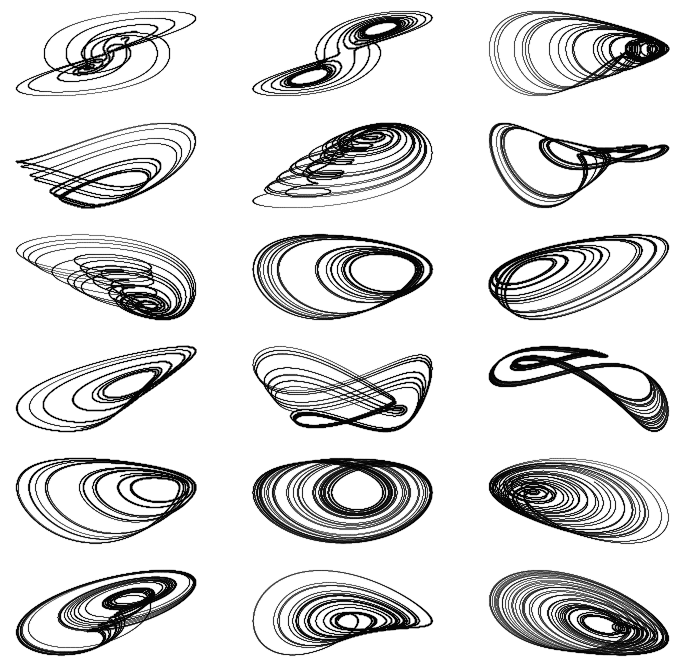

In [110]:
np.random.seed(0)
all_ensembles = list()
plt.figure(figsize=(12, 12))
for i, model in enumerate([SprottB(), SprottC(), SprottD(), SprottE(), SprottF(), SprottG(), 
              SprottH(), SprottI(), SprottJ(), SprottK(), SprottL(), SprottM(),
              SprottN(), SprottO(),SprottP(), SprottQ(), SprottR(), SprottS()]):
    
    
#     tpts = resample_timepoints(model, ic, tpts, pts_per_period=800)
    sol = model.make_trajectory(100000)
    
    plt.subplot(6, 3, i+1)
    plt.plot(sol[0], sol[1], '.k', markersize=.1)

#     ensemble = generate_ic_ensemble(model, tpts, 5, frac_perturb_param=.2)
#     all_ensembles.append(ensemble)
    
    plt.axis('off')
    
# all_ensembles = np.array(all_ensembles)
# all_ensembles.dump('all_sprott.pkl')

# Test out code

In [ ]:
np.random.seed(0)
all_ensembles = list()
plt.figure(figsize=(12, 12))
for i, model in enumerate([SprottB(), SprottC(), SprottD(), SprottE(), SprottF(), SprottG(), 
              SprottH(), SprottI(), SprottJ(), SprottK(), SprottL(), SprottM(),
              SprottN(), SprottO(),SprottP(), SprottQ(), SprottR(), SprottS()]):
    
    
#     tpts = resample_timepoints(model, ic, tpts, pts_per_period=800)
    sol = model.make_trajectory(100000)
    
    plt.subplot(6, 6, i+1)
    plt.plot(sol[0], sol[1], '.k', markersize=.1)

#     ensemble = generate_ic_ensemble(model, tpts, 5, frac_perturb_param=.2)
#     all_ensembles.append(ensemble)
    
    plt.axis('off')

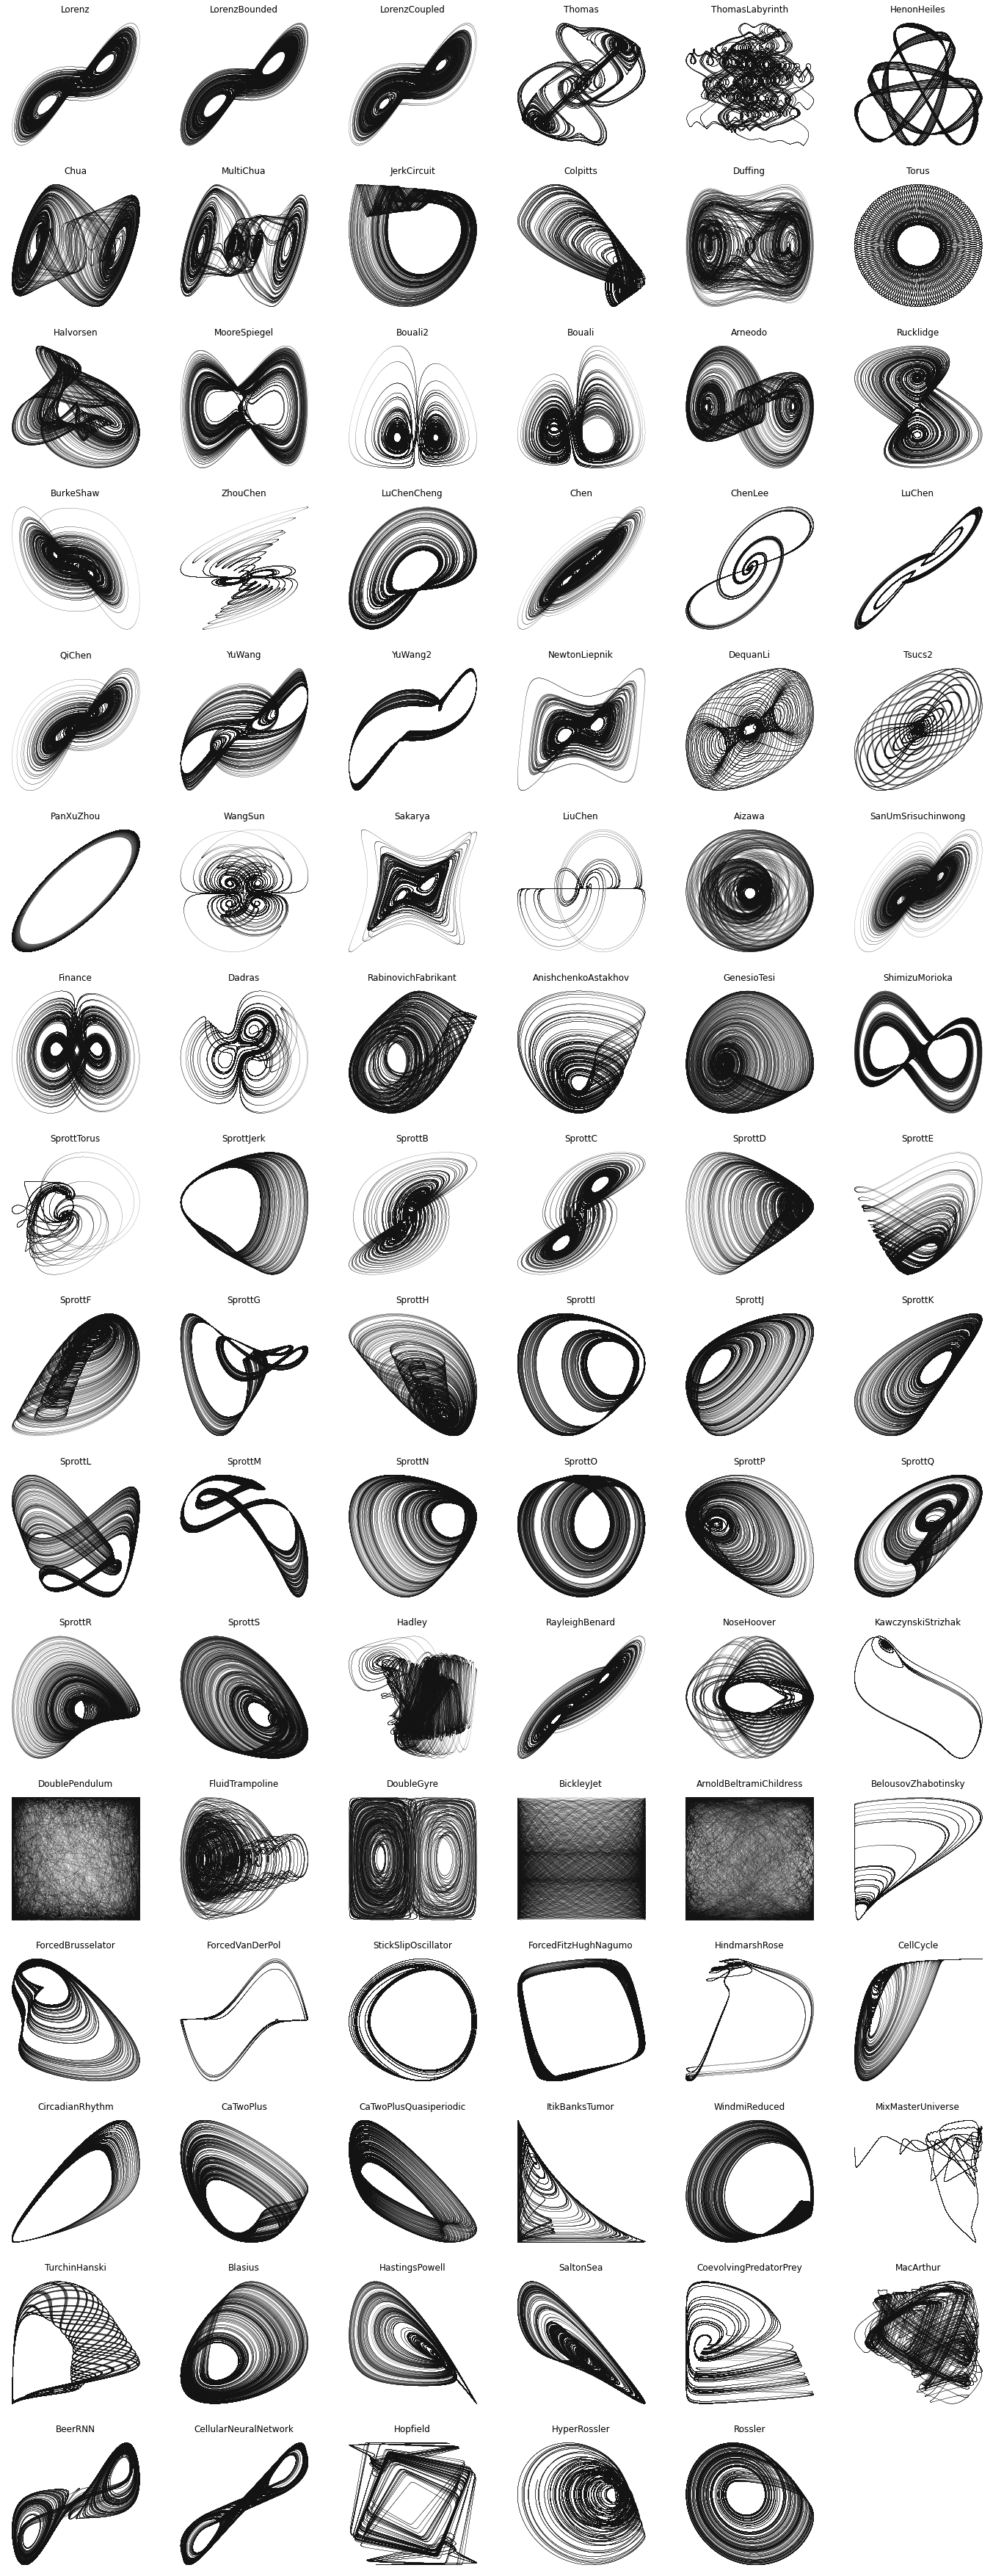

In [26]:
# with open("thom/data/chaotic_attractors.json", "r") as file:
#     data = json.load(file)
# print(len(data.keys()))



# # We will make a local copy of the internal database
# path_output = "./chaotic_attractors.json"


# all_freqs = list()
# all_sols = list()

# transient_fraction = .25
# total_length = 40000*10

all_attractors = get_attractor_list()

num_cols = 6
num_rows = int(np.ceil(len(data.keys()) / num_cols))
plt.figure(figsize=(num_cols*4, num_rows*4))
for i, item in enumerate(all_attractors):
    
    eq = getattr(thom, item)()
    sol = eq.make_trajectory(1000000)
    
    # Map unbounded indices to compact interval
    if "unbounded_indices" in list(eq._load_data().keys()):
        for ind in eq._load_data()["unbounded_indices"]:
            sol[ind] = np.sin(sol[ind]) 
    
    plt.subplot(num_rows, num_cols, i+1)
    plt.plot(sol[0], sol[1], '.k', markersize=.03)
    plt.gca().title.set_text(item)
    plt.gca().axis('off')

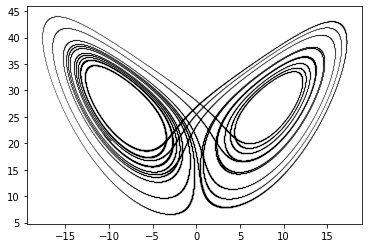

In [135]:
sol = Lorenz().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

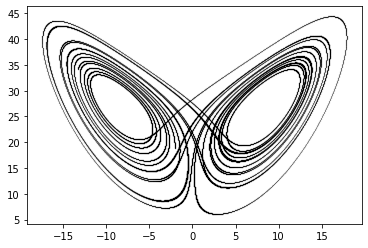

In [134]:
sol = LorenzBounded().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

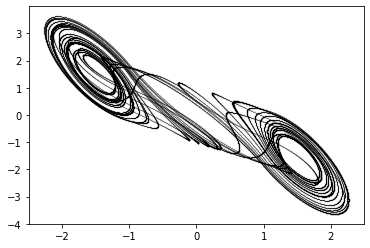

In [132]:
sol = Chua().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

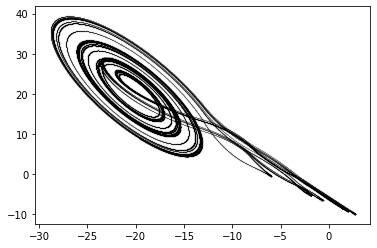

In [133]:
sol = MultiChua().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

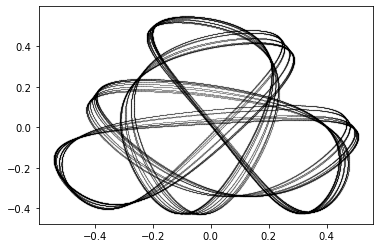

In [131]:
sol = HenonHeiles().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

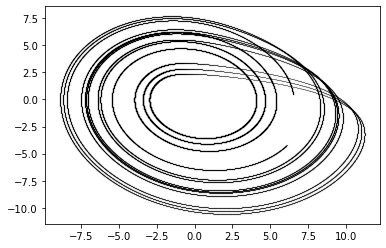

In [130]:
sol = Rossler().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

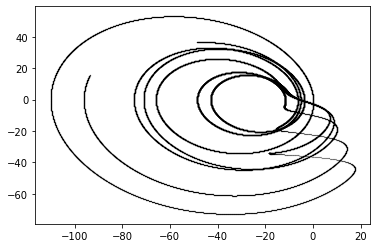

In [129]:
sol = HyperRossler().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

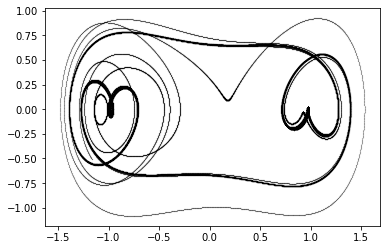

In [78]:
sol = Duffing().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

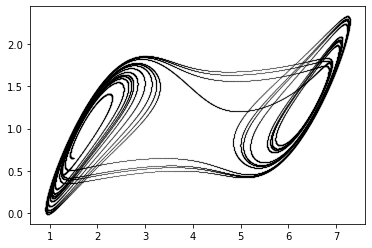

In [125]:
sol = BeerRNN().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

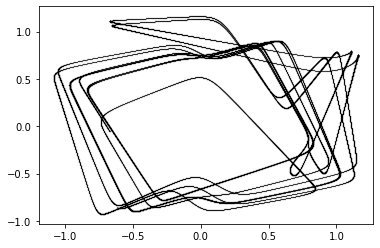

In [124]:
sol = Hopfield().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

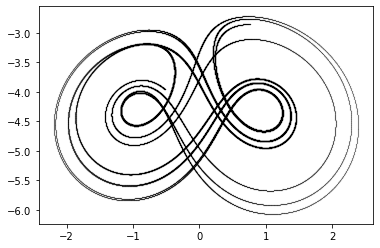

In [123]:
sol = Finance().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

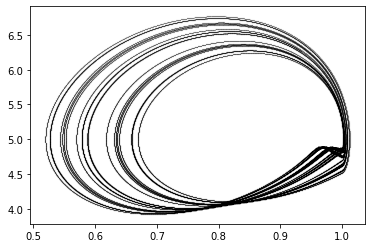

In [122]:
sol = WindmiReduced().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

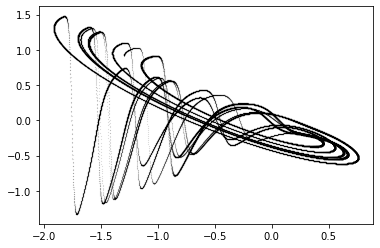

In [121]:
sol = JerkCircuit().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

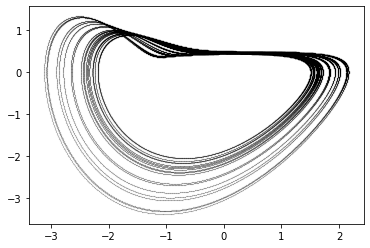

In [109]:
sol = SprottJerk().make_trajectory(100000)

plt.plot(sol[1], sol[2], '.k', markersize=.1)

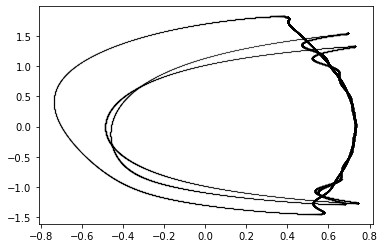

In [119]:
sol = SprottTorus().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

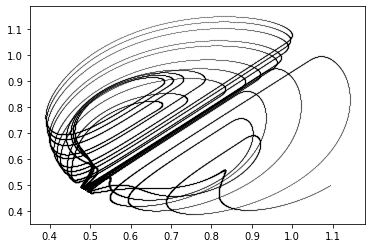

In [118]:
sol = CellCycle().make_trajectory(100000)

plt.plot(sol[0], sol[3], '.k', markersize=.1)

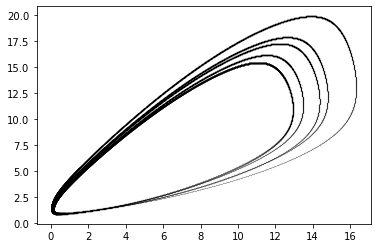

In [117]:
sol = CircadianRhythm().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

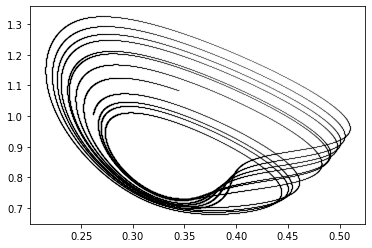

In [115]:
sol = CaTwoPlus().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

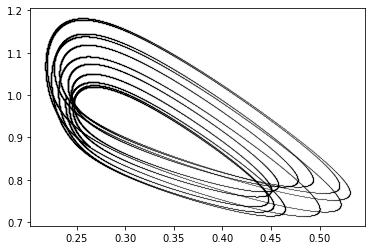

In [114]:
sol = CaTwoPlusQuasiperiodic().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

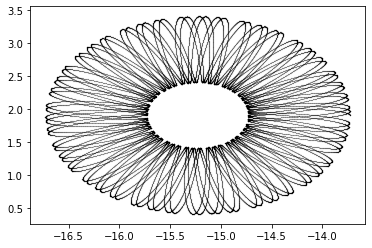

In [113]:
sol = Torus().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

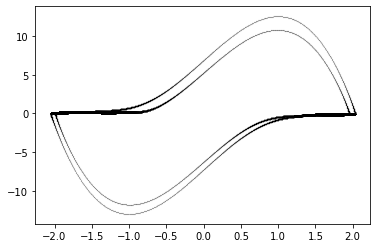

In [112]:
sol = ForcedVanDerPol().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

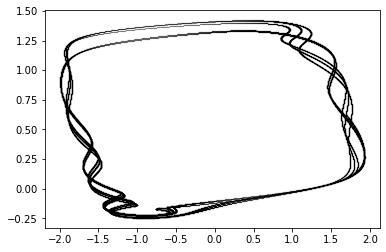

In [111]:
sol = ForcedFitzHughNagumo().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

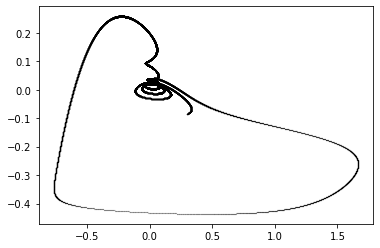

In [110]:
sol = HindmarshRose().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

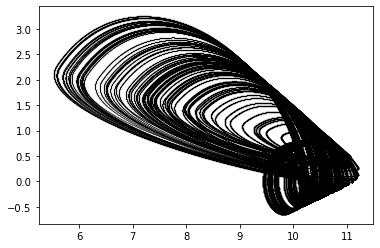

In [109]:
sol = Colpitts().make_trajectory(1000000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

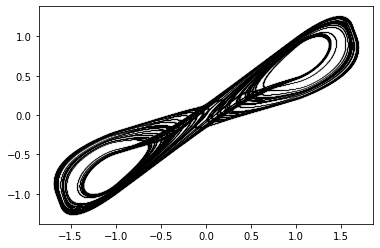

In [108]:
sol = CellularNeuralNetwork().make_trajectory(200000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

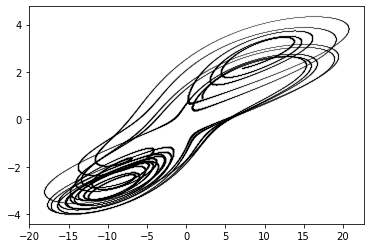

In [107]:
sol = LorenzCoupled().make_trajectory(100000)

plt.plot(sol[0], sol[3], '.k', markersize=.1)

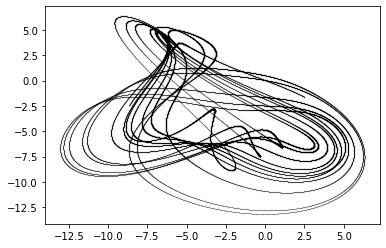

In [106]:
sol = Halvorsen().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

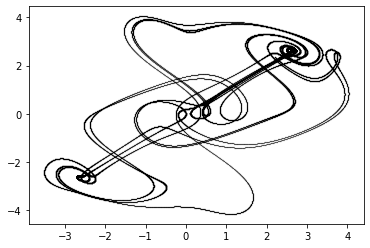

In [105]:
sol = Thomas().make_trajectory(100000)
plt.plot(sol[0], sol[1], '.k', markersize=.1)

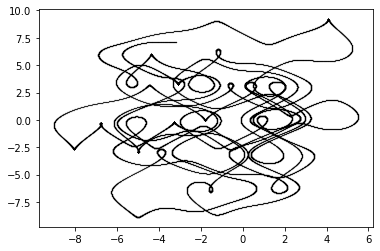

In [104]:
sol = ThomasLabyrinth().make_trajectory(100000)
plt.plot(sol[0], sol[1], '.k', markersize=.1)

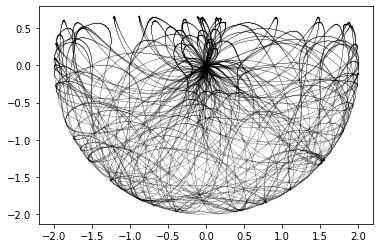

In [101]:
sol = DoublePendulum().make_trajectory(100000)

plt.plot(np.sin(sol[0]) + np.sin(sol[1]), -np.cos(sol[0]) - np.cos(sol[1]), '.k', markersize=.1)

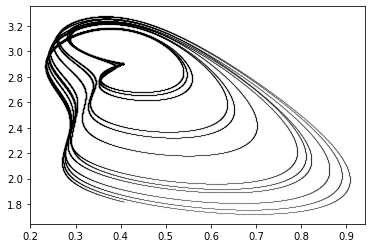

In [100]:
sol = ForcedBrusselator().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

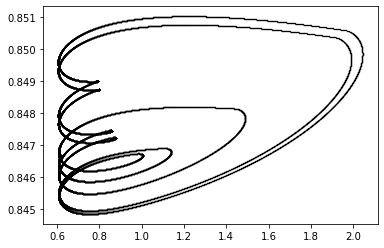

In [79]:
sol = BelousovZhabotinsky().make_trajectory(200000)

plt.plot(sol[1], sol[2], '.k', markersize=.1)

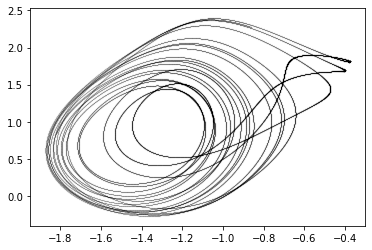

In [98]:
sol = RabinovichFabrikant().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.04)

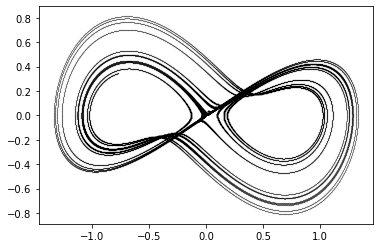

In [97]:
sol = ShimizuMorioka().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

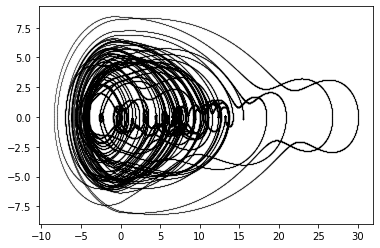

In [105]:
sol = FluidTrampoline().make_trajectory(300000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

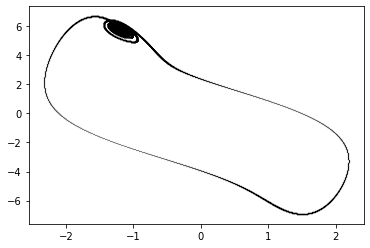

In [108]:
sol = KawczynskiStrizhak().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

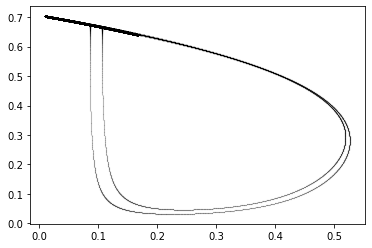

In [81]:
sol = CoevolvingPredatorPrey().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

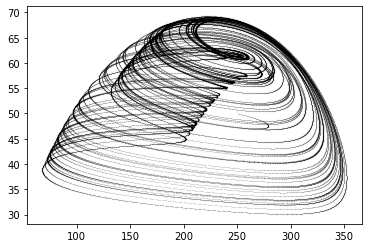

In [86]:
sol = SaltonSea().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

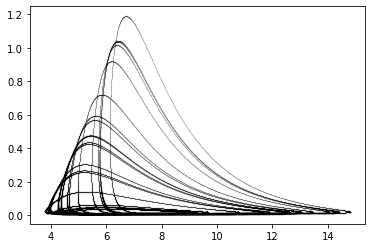

In [93]:
sol = Blasius().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

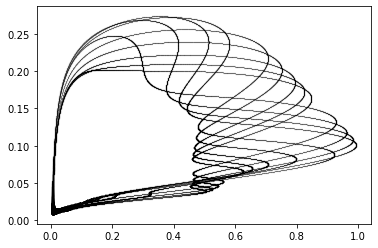

In [92]:
sol = TurchinHanski().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

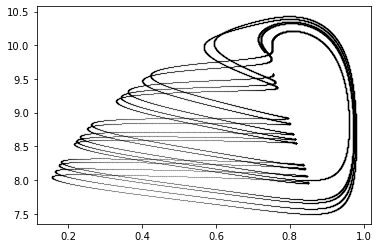

In [91]:
sol = HastingsPowell().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

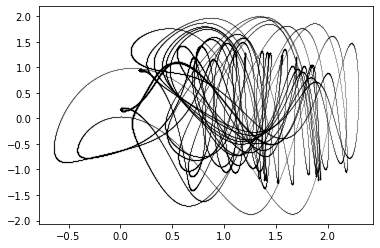

In [90]:
sol = Hadley().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

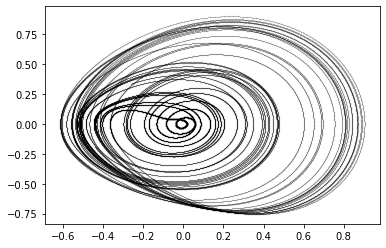

In [49]:
sol = GenesioTesi().make_trajectory(100000)

plt.plot(sol[1], sol[2], '.k', markersize=.1)

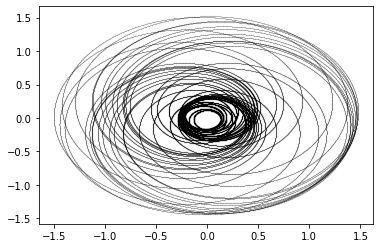

In [48]:
sol = Aizawa().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

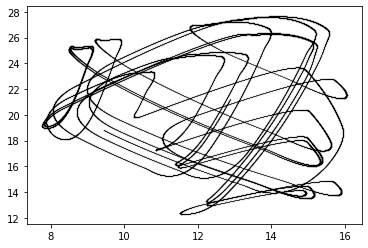

In [47]:
sol = MacArthur().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

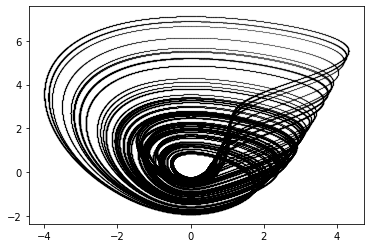

In [84]:
sol = AnishchenkoAstakhov().make_trajectory(700000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

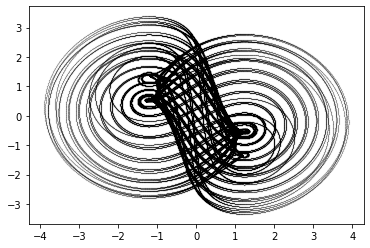

In [83]:
sol = NoseHoover().make_trajectory(300000)

plt.plot(sol[1], sol[2], '.k', markersize=.1)

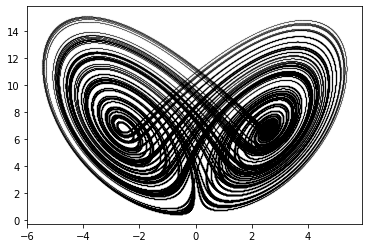

In [82]:
sol = Rucklidge().make_trajectory(600000)

plt.plot(sol[1], sol[2], '.k', markersize=.1)

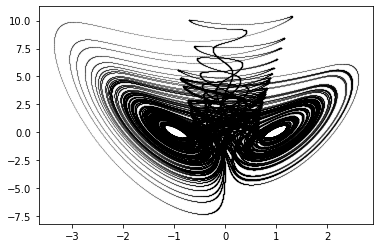

In [82]:
sol = SanUmSrisuchinwong().make_trajectory(500000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

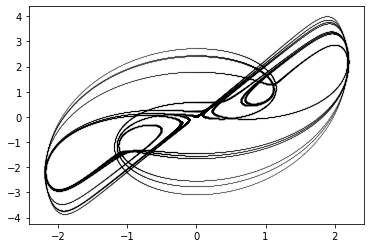

In [83]:
sol = YuWang().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

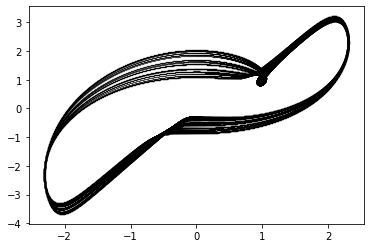

In [85]:
sol = YuWang2().make_trajectory(300000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

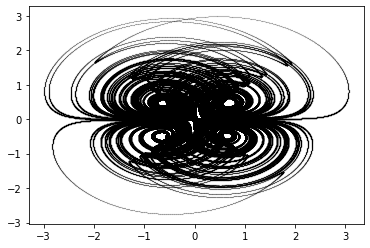

In [86]:
sol = WangSun().make_trajectory(2000000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

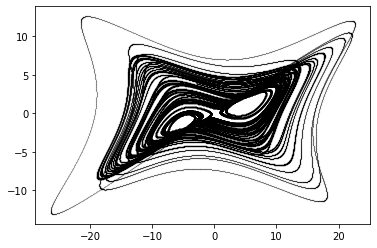

In [87]:
sol = Sakarya().make_trajectory(500000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

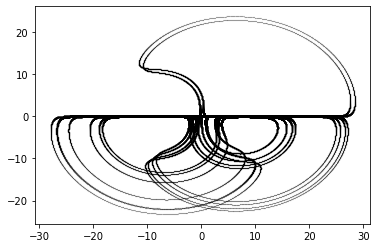

In [76]:
sol = LiuChen().make_trajectory(1000000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

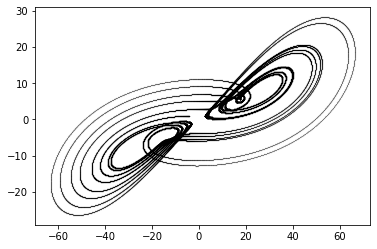

In [75]:
sol = QiChen().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

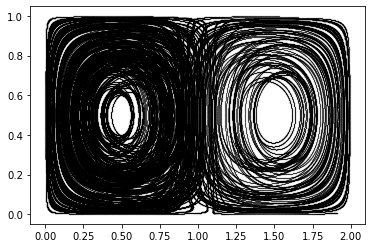

In [74]:
sol = DoubleGyre().make_trajectory(1000000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

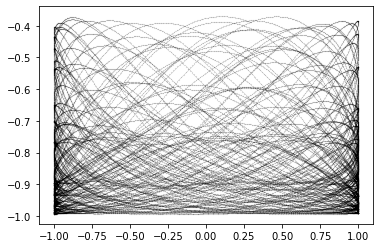

In [61]:
sol= BickleyJet().make_trajectory(100000)

plt.plot(np.sin(sol[0]), np.sin(sol[1]), '.k', markersize=.1)

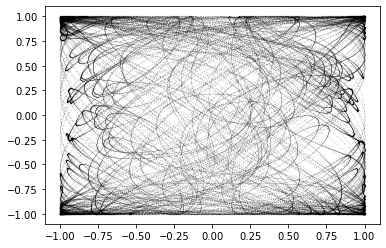

In [57]:
sol = ArnoldBeltramiChildress().make_trajectory(100000)

plt.plot(np.sin(sol[0]), np.sin(sol[1]), '.k', markersize=.1)

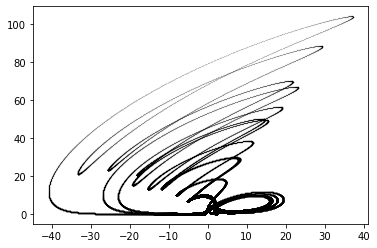

In [70]:
sol = ZhouChen().make_trajectory(300000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

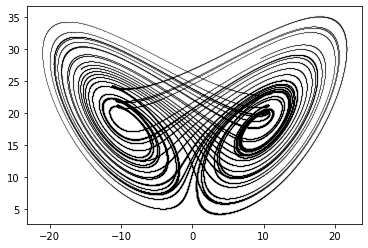

In [69]:
sol = RayleighBenard().make_trajectory(200000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

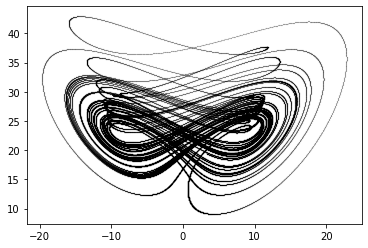

In [68]:
sol = Chen().make_trajectory(200000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

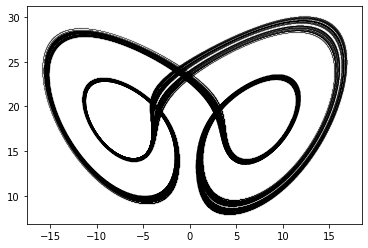

In [67]:
sol = LuChen().make_trajectory(500000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

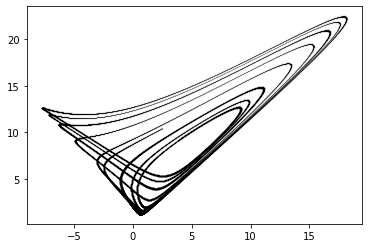

In [66]:
sol = LuChenCheng().make_trajectory(100000)

plt.plot(sol[1], sol[2], '.k', markersize=.1)

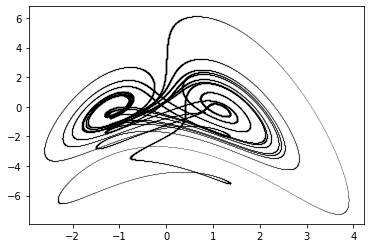

In [65]:
sol = BurkeShaw().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

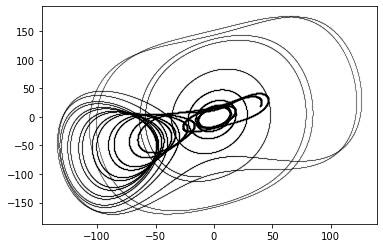

In [64]:
sol = DequanLi().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

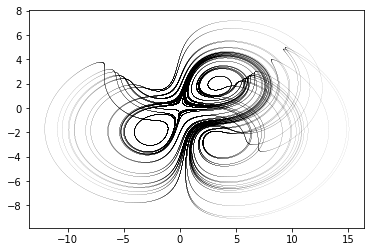

In [63]:
sol = Dadras().make_trajectory(1000000)

plt.plot(sol[0], sol[1], '.k', markersize=.01)

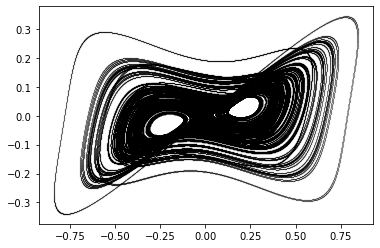

In [62]:
sol = NewtonLiepnik().make_trajectory(1000000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

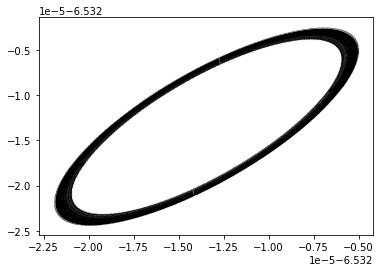

In [46]:
sol = PanXuZhou().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

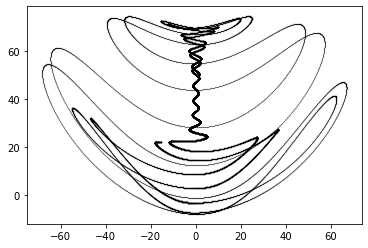

In [58]:
sol = Tsucs2().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

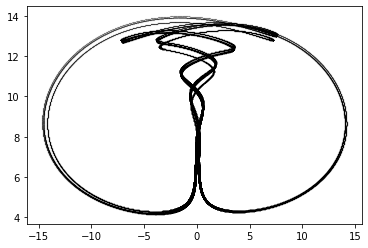

In [57]:
sol = ChenLee().make_trajectory(200000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

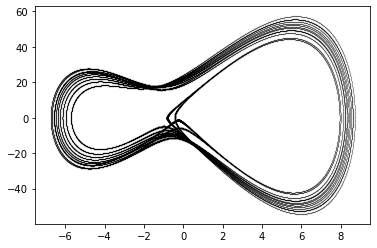

In [136]:
sol = MooreSpiegel().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

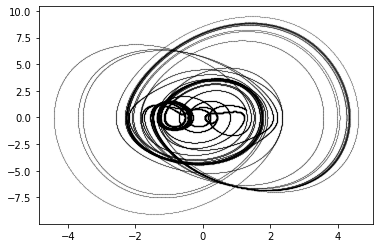

In [137]:
sol = Arneodo().make_trajectory(100000)

plt.plot(sol[1], sol[2], '.k', markersize=.1)

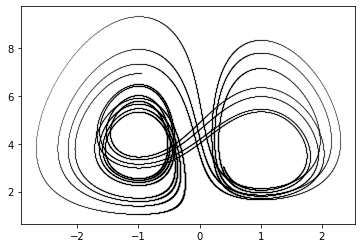

In [138]:
sol = Bouali().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

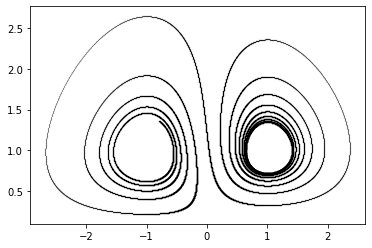

In [139]:
sol = Bouali2().make_trajectory(100000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

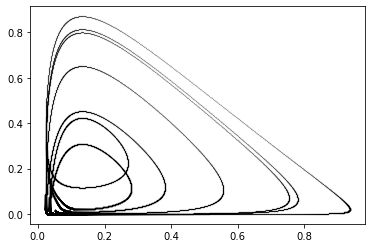

In [140]:
sol = ItikBanksTumor().make_trajectory(100000)

plt.plot(sol[0], sol[2], '.k', markersize=.1)

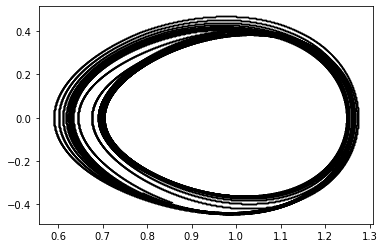

In [41]:
sol = StickSlipOscillator().make_trajectory(1000000)

plt.plot(sol[0], sol[1], '.k', markersize=.1)

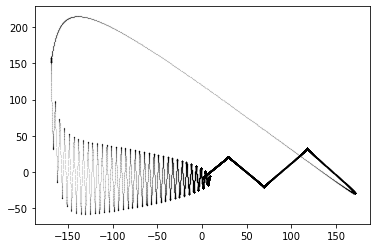

In [45]:
sol = MixMasterUniverse().make_trajectory(100000)

plt.figure()
plt.plot(sol[3], sol[4], '.k', markersize=.1)

In [58]:
?integrate_dyn

Signature: integrate_dyn(f, ic, tvals, noise=0, use_compile=True)
Docstring:
Given the RHS of a dynamical system, integrate the system
noise > 0 requires the Python library sdeint (assumes Brownian noise)

f : callable, the right hand side of a system of ODE
ic : the initial conditions
noise_amp : the amplitude of the Langevin forcing term
use_compile : bool, whether to compile the function with numba 
    before performing integration

DEV:
scipy.integrate.solve_ivp(eq, (tpts[0], tpts[-1]), np.array(ic), 
method='DOP853', dense_output=True)
eq takes (t, X) and not vice-versa
File:      ~/program_repos/thom/thom/utils.py
Type:      function


In [149]:
import json

import pkg_resources
data_path = pkg_resources.resource_filename('thom', 'data/chaotic_attractors.json')

with open(data_path, "r") as read_file:
    data = json.load(read_file)

In [ ]:
from thom.utils import signif

In [ ]:


data[item]["dt"] = signif(eq.dt, 4)
data.dumps("test.json")

In [173]:
data[item]["dt"] = signif(eq.dt, 4)

import json
with open('test.json', 'w') as f:
    json.dump(data, f, indent=4)

In [182]:
data[item]["initial_conditions"] = [signif(item, 8) for item in eq.ic]

In [ ]:
# data[item]["ic"] = signif(eq.dt, 4)

In [25]:
find_characteristic_timescale(sol[0], k=3)

array([357.14285714, 681.81818182])

In [174]:
# import sys

# We will make a local copy of the internal database
path_output = "./chaotic_attractors.json"

with open(path_output, 'w') as f:
    json.dump(data, f, indent=4)

## Find timescales and dt and write to databse

+ Numerical integration timestep is determined by the highest significant frequency in the power spectrum
+ In order to align timescales, after integration the data is resampled to have a matching leading fourier component
+ Initial conditions are chosen to lie on the attractor, but as close to one other as possible (align phases)
+ Fill out "period" field
+ Align initial up or down
+ Certain cases: BickleyJet, StickSlipOscillator fail and require manual fine-tuning of dt

In [88]:
import json

import thom
from thom.utils import standardize_ts, find_characteristic_timescale, freq_from_autocorr, freq_from_fft, resample_timepoints, integrate_dyn, signif


with open("thom/data/chaotic_attractors.json", "r") as file:
    data = json.load(file)
print(len(data.keys()))



# We will make a local copy of the internal database
path_output = "./chaotic_attractors.json"


all_freqs = list()
all_sols = list()

transient_fraction = .25
total_length = 40000*10

for item in list(data.keys())[80:]:
# for item in ["FluidTrampoline"]:
    
    eq = getattr(thom, item)()
    
    try:
        pts_per_period = 1000
        base_freq = 1 / pts_per_period
        sol0 = eq.make_trajectory(total_length)
        eq.ic = list(sol0[:, -1])
        sol = standardize_ts(sol0.T).T[:, int(transient_fraction*total_length):]

        for i in range(5):
            # freq = freq_from_autocorr(sol[0])
            # freq = freq_from_fft(sol[0])
            # freq = 1/find_characteristic_timescale(sol[0])
            freq = np.max(find_significant_frequencies(sol[0]))
            period = base_freq / freq
            eq.dt = eq.dt * period # larger period needs larger timestep
            sol0 = eq.make_trajectory(total_length)
            eq.ic = list(sol0[:, -1])
            sol = standardize_ts(sol0.T).T[:, int(transient_fraction*total_length):]
            print(freq, end = " ")
        print("\n")

        all_sols.append(sol)

        freq2 = freq_from_fft(sol[0])
        all_freqs.append((freq, freq2))

        data[item]["initial_conditions"] = [signif(item, 8) for item in eq.ic]
        data[item]["dt"] = signif(eq.dt, 4)
    
    except Exception as e:
        print(e)
        pass

# Save an updated copy of the database
with open(path_output, 'w') as f:
    json.dump(data, f, indent=4)

95
0.0011966666666666666 0.0010033333333333333 0.001 0.001 0.00083 



## Find and write period of each attractor
+ Expressed in units of dt

In [ ]:
period = 1/freq_from_fft(sig)

## Plot attractors with matching dominant timescales

+ This does not look great, because the sub-leading timescales are clearly more important for some attractors

25.000002577555016

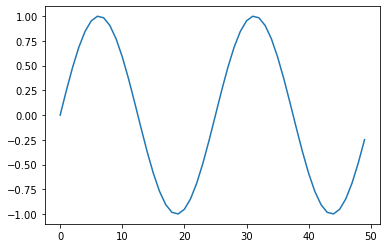

In [40]:
sig = np.sin(2*np.pi*np.arange(100)/25) 
plt.plot(sig[:50])
1/freq_from_fft(sig)


50
195
220
22
17
2
29
235
6
86


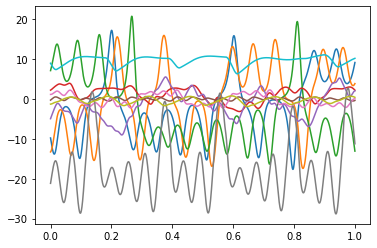

In [121]:
# Find the number of integration timepoints per period

import thom

transient_fraction = 0.1
total_length = 100000
points_per_period = 1000

for item in list(data.keys())[:10]:
    eq = getattr(thom, item)()
    sol = eq.make_trajectory(total_length)
    
    
    freq_ceiling = np.max(find_significant_frequencies(sol[0]))
    freq_dominant = freq_from_fft(sol[0])
    
    timepoints_per_cycle = int(freq_ceiling/freq_dominant)
    print(timepoints_per_cycle)
    
    sol = eq.make_trajectory(timepoints_per_cycle*2000)
#     sol = eq.make_trajectory(50000)
    
    plt.plot(np.linspace(0, 1, len(sol[0])), sol[0])
    
#     plt.figure()
#     plt.plot(sol[0], sol[1], 'k')
    

In [13]:

from numpy.fft import rfft
from scipy.signal import blackmanharris, fftconvolve, periodogram


def surrogate_time_series(sig):
    """
    Construct a surrogate time series
    """
    


1.3333333333333333e-05

In [27]:

# insert a control function that takes the current values of all vars and adds forcing

# various functions for sampling from each system, and removing transients

# function that goes to numba

# function that couples attractors together (can use slaving to force chaos)

In [ ]:
#https://stackoverflow.com/questions/1796180/how-can-i-get-a-list-of-all-classes-within-current-module-in-python

In [ ]:
## Some day have an API working

import inspect


def generate_data(model, n_samples, params, frac_perturb_param=.1, 
                             n_classes=2, frac_transient=0.1, 
                             ic_range=None,
                            random_state=0):
    """
    Generate an ensemble of trajectories with random initial conditions, labelled by different
    sets of parameters.

    model : an instantiation of a dynamical system
    tpts : the timesteps over which to run the simulation
    params : iterable, the starting values for the parameters
    n_samples : int, the number of different initial conditons
    n_classes : int , the number of different parameters
    frac_perturb_param : float, the amount to perturb the parameters by
    frac_transient : float, the fraction of time for the time series to settle onto the attractor
    ic_range : a starting value for the initial conditions
    random_state : int, the seed for the random number generator
    """

    num_per_class = int(n_samples/n_classes)

    params = inspect.getfullargspec(model.__init__).defaults # get default values of params
    
    params = model.get_params()

    param_fractional_perturb = frac_perturb*2*(np.random(len(model.default_params)) - 0.5)
    params = model.default_params*param_fractional_perturb

    mod = model(*params)
    
    
    
    
    np.random.seed(random_state)
    
    ntpts = len(tpts0)
    dt = tpts0[1] - tpts0[0]
    t_range = tpts0[-1] - tpts0[0]
    tpts = np.arange(tpts0[0], tpts0[0] + t_range*(1 + frac_transient), dt)
    
    all_params = list()
    all_samples = list()
    for i in range(n_classes):
    
        params_perturb = 1 + frac_perturb_param*(2*np.random.random(len(params)) - 1)
        params_prime = params*params_perturb
        all_params.append(params_prime)
    
        eq = Lorenz(*params_prime)
        
        all_samples_per_class = list()
        for j in range(num_per_class):
            ic_prime = (-8.60632853, -14.85273055,  15.53352487)*np.random.random(3)
            sol = integrate_dyn(eq, ic_prime, tpts)
            
            all_samples_per_class.append(sol[:, -ntpts:]) # remove transient
        all_samples.append(all_samples_per_class)
    
    all_samples, all_params = np.array(all_samples), np.array(all_params)
    return all_samples, all_params